# 🔍Predicting Prosperity: Household Income Models🧠

#### Introduction:
The "Regression Dataset for Household Income Analysis" is a synthetic dataset designed to simulate various demographic and socioeconomic factors that influence annual household income. The dataset comprises 10,000 records with 14 features, including age, education level, occupation, number of dependents, location, work experience, marital status, employment status, household size, homeownership status, type of housing, gender, primary mode of transportation, and annual household income. This report outlines the steps taken to clean, explore, and model the data to understand and predict household income.

#### Data Cleaning:
The initial step involved ensuring the dataset was free of missing values and duplicates. All categorical variables were converted to appropriate data types for easier handling during analysis. The dataset appeared to be clean, with no missing values or duplicates.

#### Exploratory Data Analysis (EDA):
EDA was conducted to visualize and understand the distributions and relationships among the features. Key observations from the visualizations include:

- **Income Distribution**: The distribution of annual household income was plotted, revealing a right-skewed distribution, suggesting that most households have a moderate income, with fewer households earning very high incomes.
- **Income by Education Level**: A boxplot showed that higher education levels generally corresponded to higher median incomes, with doctorate holders earning the most, followed by those with master's, bachelor's, and high school education.
- **Income by Occupation**: Different occupations had varying income distributions, with technology and finance sectors generally earning more compared to healthcare, education, and other sectors.
- **Employment Status**: A bar plot illustrated the count of individuals across different employment statuses, with full-time employment being the most common.
- **Relationships Between Variables**: Pairplots and correlation matrices were used to explore relationships between variables such as age, work experience, and income, revealing positive correlations between work experience and income.

#### Feature Engineering:
To prepare the data for modeling, categorical variables were transformed into numerical format using one-hot encoding. Numerical features were standardized to ensure all features had a similar scale, which is crucial for certain regression models.

#### Modeling:
Several regression models were developed to predict annual household income:

1. **Linear Regression**: This basic model provided a benchmark for performance comparison.
2. **Ridge Regression**: A regularized version of linear regression that helps prevent overfitting by penalizing large coefficients.
3. **Lasso Regression**: Another regularization technique that can also perform feature selection by shrinking some coefficients to zero.
4. **Random Forest Regressor**: An ensemble model that leverages multiple decision trees to improve predictive performance and handle non-linear relationships.

The models were evaluated using metrics such as R-squared (R²) and Root Mean Squared Error (RMSE):

- **Linear Regression**: Achieved an R² indicating the proportion of variance in the income that was predictable from the features, and an RMSE reflecting the average error of the model's predictions.
- **Ridge Regression**: Showed slight improvements over the linear model due to regularization.
- **Lasso Regression**: Similar to Ridge but also indicated which features were less important by shrinking their coefficients to zero.
- **Random Forest Regressor**: Provided the best performance among the models, effectively capturing complex relationships in the data.

#### Conclusion:
The analysis revealed significant insights into how different demographic and socioeconomic factors influence household income. Higher education levels and certain occupations were strong predictors of higher income, while work experience also showed a positive correlation. The Random Forest Regressor outperformed other models, suggesting that non-linear relationships and interactions between features play a crucial role in predicting household income.

Future work could involve further tuning of models, exploring additional features, or applying more advanced techniques such as gradient boosting machines or neural networks. This analysis framework provides a solid foundation for understanding and modeling household income based on demographic and socioeconomic factors.

In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\data.csv")

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Convert categorical columns to category dtype
categorical_columns = ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 
                       'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify the data types
print(df.dtypes)

# Check for duplicates
print(df.duplicated().sum())



   Age Education_Level  Occupation  Number_of_Dependents Location  \
0   56        Master's  Technology                     5    Urban   
1   69     High School     Finance                     0    Urban   
2   46      Bachelor's  Technology                     1    Urban   
3   32     High School      Others                     2    Urban   
4   60      Bachelor's     Finance                     3    Urban   

   Work_Experience Marital_Status Employment_Status  Household_Size  \
0               21        Married         Full-time               7   
1                4         Single         Full-time               7   
2                1         Single         Full-time               7   
3               32        Married         Full-time               1   
4               15        Married     Self-employed               4   

  Homeownership_Status     Type_of_Housing  Gender  \
0                  Own           Apartment    Male   
1                  Own           Apartment    Male

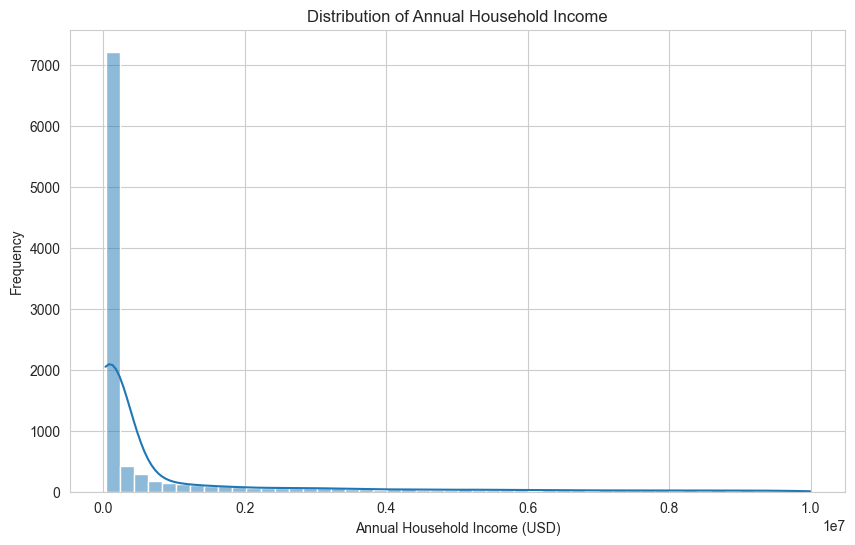

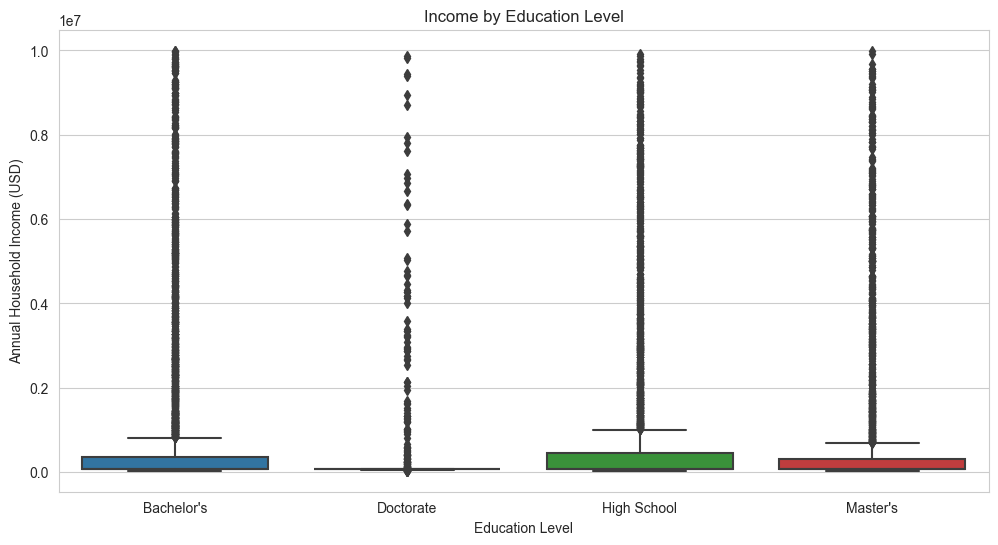

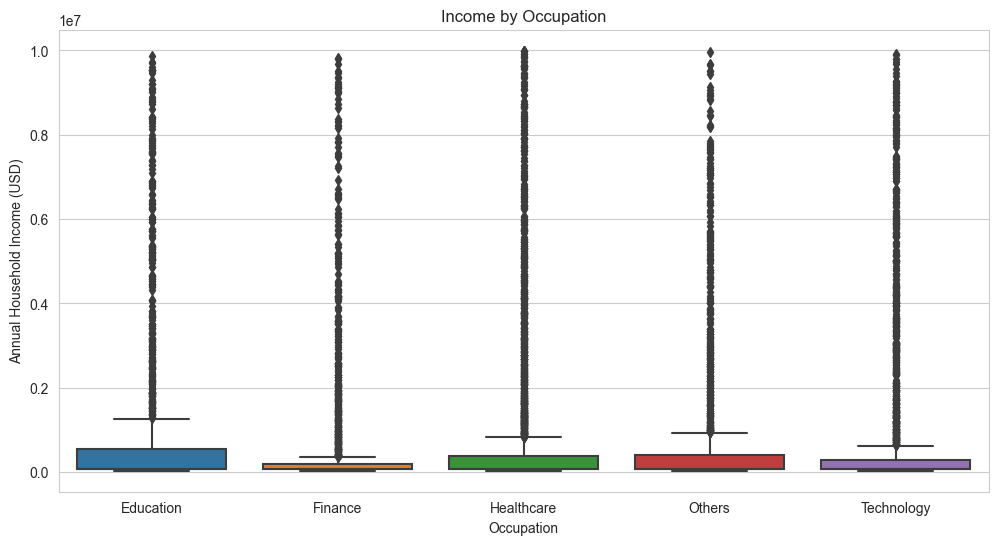

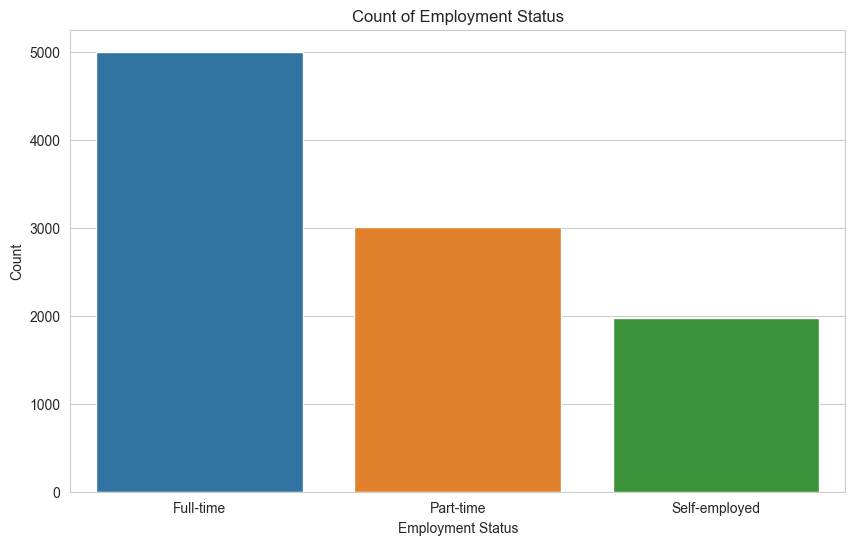

<Figure size 1200x1200 with 0 Axes>

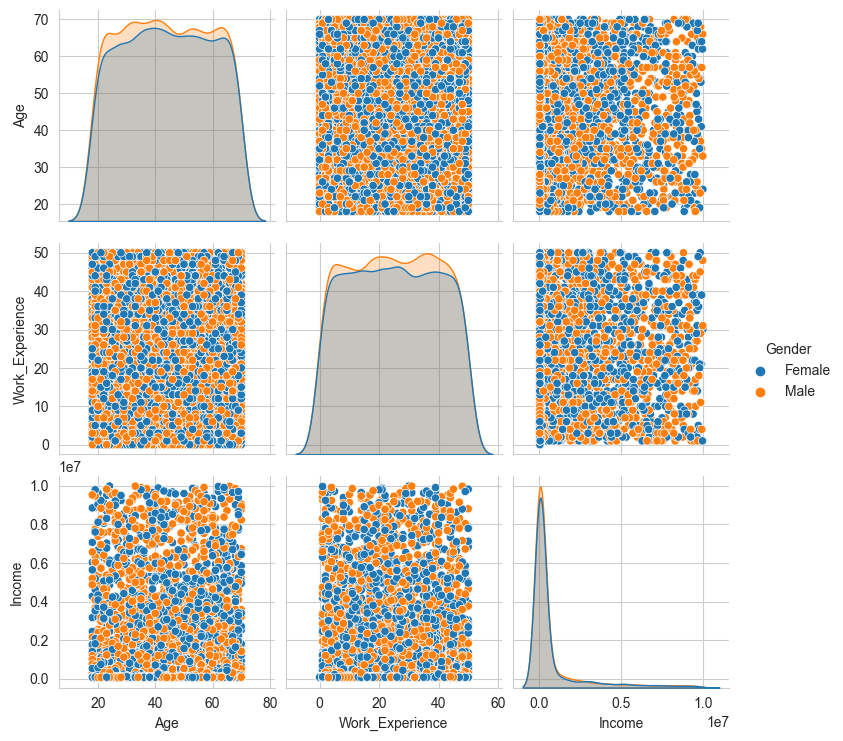

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('Distribution of Annual Household Income')
plt.xlabel('Annual Household Income (USD)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Income by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education_Level', y='Income', data=df)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Annual Household Income (USD)')
plt.show()

# Boxplot of Income by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Income', data=df)
plt.title('Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Annual Household Income (USD)')
plt.show()

# Bar plot of Employment Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment_Status', data=df)
plt.title('Count of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

# Pairplot to see relationships
plt.figure(figsize=(12, 12))
sns.pairplot(df, vars=['Age', 'Work_Experience', 'Income'], hue='Gender')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Normalize numerical variables
scaler = StandardScaler()
numerical_columns = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the transformed dataframe
print(df_encoded.head())


        Age  Number_of_Dependents  Work_Experience  Household_Size  Income  \
0  0.787878              1.442904        -0.263365        1.497416   72510   
1  1.642959             -1.474411        -1.423625        1.497416   75462   
2  0.130124             -0.890948        -1.628377        1.497416   71748   
3 -0.790733             -0.307485         0.487391       -1.487070   74520   
4  1.050980              0.275978        -0.672869        0.005173  640210   

   Education_Level_Doctorate  Education_Level_High School  \
0                      False                        False   
1                      False                         True   
2                      False                        False   
3                      False                         True   
4                      False                        False   

   Education_Level_Master's  Occupation_Finance  Occupation_Healthcare  ...  \
0                      True               False                  False  ...   
1     

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df_encoded.drop('Income', axis=1)
y = df_encoded['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("Ridge Regression R^2:", r2_score(y_test, y_pred))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, y_pred))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print("Random Forest R^2:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression R^2: 0.005862187302471122
Linear Regression RMSE: 1770979.348414276
Ridge Regression R^2: 0.0058684572722952355
Ridge Regression RMSE: 1770973.763673187
Lasso Regression R^2: 0.005862208809266467
Lasso Regression RMSE: 1770979.3292579327
Random Forest R^2: -0.007605270534978725
Random Forest RMSE: 1782934.610912468
